In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.cluster.vq import kmeans, vq

from sklearn import datasets


# Introduction to Clustering

Clusetering is an unsupervised learning approach to identifying similarities between various groups.

In [2]:
flower_data = datasets.load_iris()
X = flower_data.data
y = flower_data.target

In [4]:
flower_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

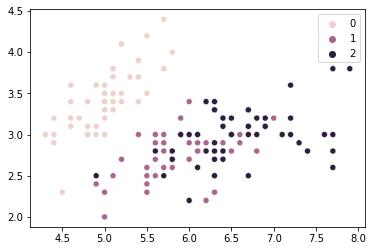

In [13]:
X_sp = X[:,0]
X_sw = X[:,1]

sns.scatterplot(x = X_sp, y = X_sw, hue = y)
plt.show()

Is there a set of clusters that can be derived in the above graph? It seems there's two distinct clusters, with a possible third. There are two approaches: 
- Hierarchical Clustering
    - Every point is a single cluster. 
    - On each iteration the nearest points are merged. 
- k-means Clustering
    - A random cluster centre is placed on the graph. 
    - Based on a certain criteria, certain points are considered part of that cluster. 

In [20]:
X_2d = X[:,0:2]

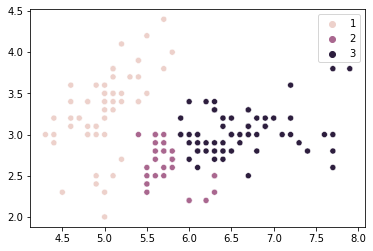

In [45]:
# Simple Hierarchical Clustering
link = linkage(X_2d, 'ward')
labels = fcluster(link, 3, criterion = 'maxclust')

sns.scatterplot(x = X_2d[:,0], y = X_2d[:,1], hue = labels)
plt.show()

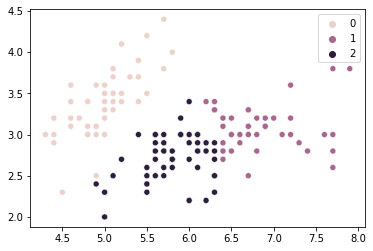

In [21]:
# Simple KMeans Clustering
centroids, _ = kmeans(X_2d, 3)
labels, _ = vq(X_2d, centroids)

sns.scatterplot(x = X_2d[:,0], y = X_2d[:,1], hue = labels)
plt.show()

Before going forward: 
- Data must be normalised. 
- Large variances are not suitable for clustering.

# Hierarchical Clustering

Parameters:
- Distance Matrix (linkage):
    - method (proximity of clusters)
        - single: based on two closest
        - complete: based on two farthest
        - average: numeric mean of all objects
        - centroid: geometic mean of all objects
        - median: median of all objects
        - ward: based on sum of squares
    - metric (distance metric)

- Creating labels (fcluster)

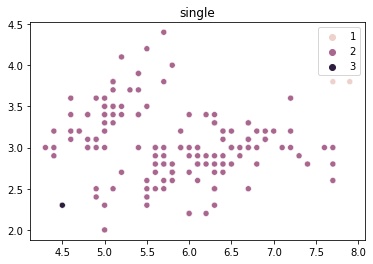

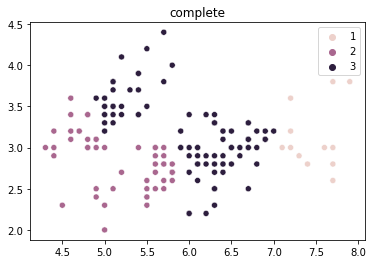

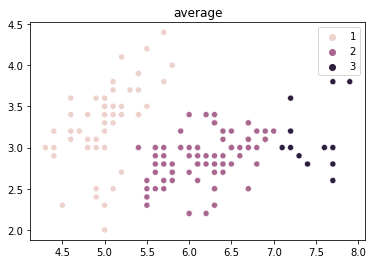

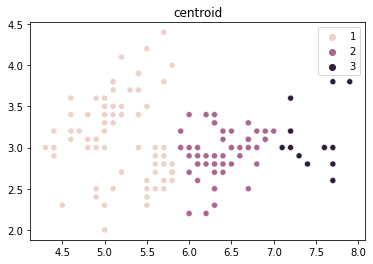

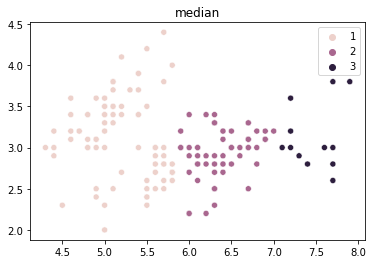

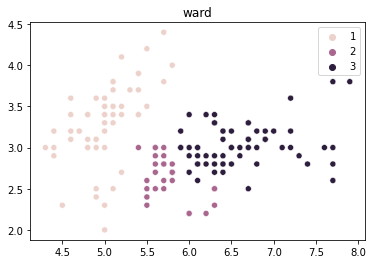

In [38]:
methods = ['single', 'complete', 'average', 'centroid', 'median', 'ward']

for method in methods:
    
    link = linkage(X_2d, method, metric = 'euclidean')
    labels = fcluster(link, 3, 'maxclust')

    sns.scatterplot(x = X_2d[:,0], y = X_2d[:,1], hue = labels)
    plt.title(method)
    plt.show()

## Dendrograms

Dendrograms allow us to extract the numbers of clusters in a dataset. 

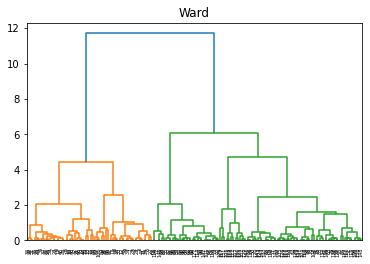

In [44]:
link = linkage(X_2d, method = 'ward', metric = 'euclidean')

dn = dendrogram(link)
plt.title('Ward')
plt.show()

Because of 'ward' each cluster is based on the sum squares, and so each pair is computed as such. Drawing a horizontal line gives each cluster based on what it intersects. There is a small window at five for three clusters. 

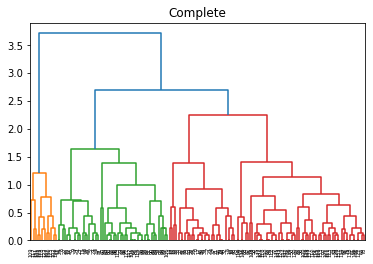

In [43]:
link = linkage(X_2d, method = 'complete', metric = 'euclidean')

dn = dendrogram(link)
plt.title('Complete')
plt.show()

## Limitations

- linkage is slow. 
- Increases non-linearly as data grows. 
- Not good for large datasets.

# K-Means Clustering

KMeans Parameters:
- data
- Number of clusters
- iter
- thresh (terminates after a certain threshold)
- check_finite
Returns cluster centres and distortion (single)

vq Parameters:
- data
- cluster centres
- check_finite
Reuturns labels and distortion (list)

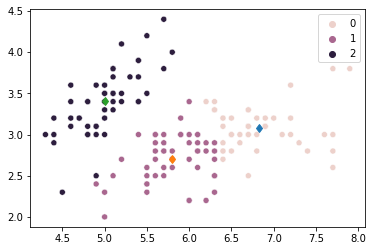

In [84]:
cluster_centres, _ = kmeans(X_2d, 3)
labels, _ = vq(X_2d, cluster_centres)

sns.scatterplot(x = X_2d[:,0], y = X_2d[:,1], hue = labels)
plt.plot(cluster_centres[0,0], cluster_centres[0,1], marker = 'd')
plt.plot(cluster_centres[1,0], cluster_centres[1,1], marker = 'd')
plt.plot(cluster_centres[2,0], cluster_centres[2,1], marker = 'd')
plt.show()

## Determining clusters: Elbow Plot

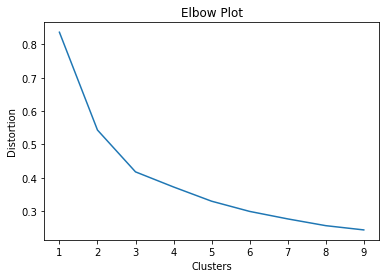

In [86]:
clusters = np.arange(1,10)
scores = []

for i in clusters:
    cluster_centres, distortion = kmeans(X_2d, i)
    labels, distortion_list = vq(X_2d, cluster_centres)
    scores.append(distortion)

plt.plot(clusters, scores)
plt.title('Elbow Plot')
plt.xlabel('Clusters')
plt.ylabel('Distortion')
plt.show()

There is an argument to be made for two or three clusters.

## Limitations

- Hard to find the right number of clusters.
- Seeding is important. 
- Biased towards equal sized clusters.